# Example 2.2: Fourier transform by numerical integration
In this example, we will calculate the Fourier transform of the function.

$$X(t) = e^{\alpha t}  t\ge 0$$

$$ x(t) = \left\{ \begin{array} {c} e^{-\alpha t} \quad  t\ge 0 \\ 0 \quad t < 0 \end{array} \right. $$

It is assumed that $\alpha>0$. We start by plotting the function below

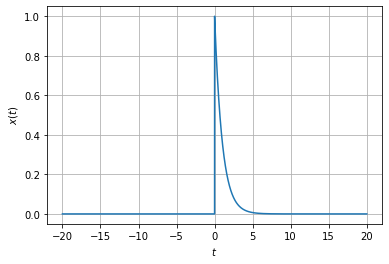

In [22]:
import numpy as np
from matplotlib import pyplot as plt

alpha = 1.0
t = np.linspace(-20.0,20.0,10001)
x = np.exp(-alpha*t)
x[t<0] = 0

plt.figure()
plt.plot(t,x);
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.grid()

The Fourier transform is defined by
$$X(\omega) = \frac{1}{2\pi}  \int_{-\infty} ^{\infty} x(t) e^{-i\omega t} dt$$

## Analytical results
We start by calculating the Fourier transfrom analytically
$$X(\omega) = \frac{1}{2\pi}  \int_{-\infty} ^{\infty} x(t) e^{-i\omega t} dt$$

$$X(\omega) = \frac{1}{2\pi}  \int_{0} ^{\infty} e^{-i\alpha t} e^{-i\omega t}dt $$

$$ X(\omega) = \frac{1}{2\pi}  \int_{0} ^{\infty} e^{-(\alpha + i\omega t)} dt$$

$$ X(\omega) = -\frac{1}{2\pi} \left[ \frac{1}{\alpha + i\omega} e^{-(\alpha + i\omega)t}  \right]_{0}^{\infty} $$ 

$$ X(\omega) = \frac{1}{2\pi} \frac{1}{\alpha + i\omega}$$ 

The Fourier transform is shown in the figure below.

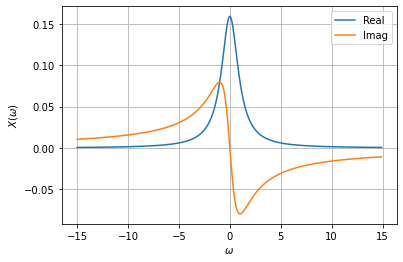

In [23]:
w = np.arange(-15.0,15.0,0.1)
X = 1 /2/np.pi /(alpha + 1j*w)

plt.figure()
plt.plot(w,np.real(X),label = 'Real');
plt.plot(w,np.imag(X),label = 'Imag');
plt.grid()
plt.ylabel(r'$X(\omega)$');
plt.xlabel(r'$\omega$');
plt.legend();

## Fourier transform by numerical integration
We can also calculate the Fourier transform by numerical integration. The cell below shows how to calculate the Fourier transform by the trapezoidal rule

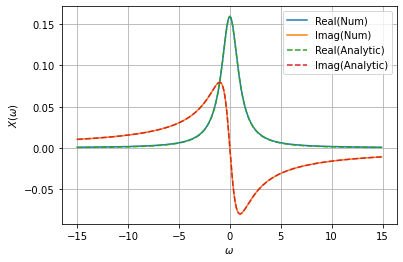

In [24]:
X2 = np.zeros(w.shape[0],dtype=complex)
for k in range(w.shape[0]):
    X2[k] = 1/2/np.pi*np.trapz(x*np.exp(-1j*w[k]*t),t)

plt.figure()
plt.plot(w,np.real(X2),label='Real(Num)');
plt.plot(w,np.imag(X2),label = 'Imag(Num)');
plt.plot(w,np.real(X),'--',label='Real(Analytic)');
plt.plot(w,np.imag(X),'--',label = 'Imag(Analytic)');
plt.grid()
plt.ylabel(r'$X(\omega)$');
plt.xlabel(r'$\omega$');
plt.legend();

The results obtained by numerical integration is shown together with the analytical solution in the figure above. The numerical results are equal to the analytical solution.


## Calculating the Fourier transform by the fft algorithm

The Fourier transform is defined by 

$$X(\omega) = \frac{1}{2\pi}  \int_{-\infty} ^{\infty} x(t) e^{-i\omega t} dt$$

The discrete Fourier transform is defined by

 $$X_k = \frac{1}{N} \sum_{r=0}^{N-1} X_r e^{-i\left(\frac{2\pi k r}{N} \right)}$$
 
 The following relation between the discrete Fourier transform and the continuous Fourier transform can then be obtained. Note that the 1/N needs to be added in the Python code since it is not included in the calculation of the fft in the NumPy package.
 
 $$ X(\omega_k) = \frac{\Delta t}{2\pi} X_k $$
 
 Here $X(\omega_k)$ is the continuous Fourier transform while $X_k$ is the discrete Fourier transform. We can use this relation to calculate the Fourier transform by FFT.  The DFT and FFT assume that the time series starts at $t=0$. This is not the case, so it is necessary to use the first shift theorem and multiply the DFT with $e^{-i\omega t(0)}$

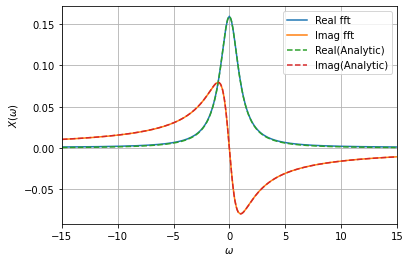

In [25]:
Xfft = np.fft.fft(x) 
Xfft = np.fft.fftshift(Xfft) # This shifts the DFT negative f, mean, positive f: [-w 0 w]
dt = t[1]-t[0] # Time step
f = np.linspace(-1/2/dt,1/2/dt,t.shape[0]); # Frequency axis in Hz
w2 = 2.0*np.pi*f # Frequency axis in rad/s
N = len(Xfft)
Xfft = Xfft*np.exp(-1j*w2*-1.0*t[0])/2/np.pi*dt # DFT assumes that the function starts in t=0. Apply first shift teorem.
#Xfft = Xfft*np.exp(-1j*w2*-1.0*t[0])/2/np.pi/N*t[-1]*2 (Alternative expression)


plt.plot(w2,np.real(Xfft),label = 'Real fft')
plt.plot(w2,np.imag(Xfft),label = 'Imag fft')
plt.plot(w,np.real(X),'--',label='Real(Analytic)');
plt.plot(w,np.imag(X),'--',label = 'Imag(Analytic)');
plt.xlim((-15, 15));
plt.grid();
plt.ylabel(r'$X(\omega)$');
plt.xlabel(r'$\omega$');
plt.legend();



The figure shows that the approximation provided by the discrete Fourier transform (FFT) is very accurate. Good accuracy is achieved since the time series is long enough and a sufficiently small sampling interval has been used. Try to change the sampling interval and the duration of the time series to study how this impacts the results.